# Check Point 2 - Implementar análise automatizada de dados

## FIAP - Eng de Software

### Data Science & Statistical Computing

#### Analisando dados de obitos dos anos 2020 e 2023



Nome: Julia Masson RM: 98134

Nome: Julia Palomari RM: 551910

Nome: Leticia Fontana RM: 550289

In [99]:
import pandas as pd

df_2020 = pd.read_csv('obitos-2020.csv')
df_2023 = pd.read_csv('obitos-2023.csv')

####HVPLOT

In [107]:
import pandas as pd
import hvplot.pandas

agg_2020 = df_2020.groupby('tipo_doenca')['total'].sum().reset_index()
agg_2020['ano'] = 2020

agg_2023 = df_2023.groupby('tipo_doenca')['total'].sum().reset_index()
agg_2023['ano'] = 2023

df_combined = pd.concat([agg_2020, agg_2023], axis=0, ignore_index=True)

bar_plot = df_combined.hvplot.bar(
    x='tipo_doenca',
    y='total',
    by='ano',
    stacked=False,
    title='Comparação de Óbitos por Tipo de Doença em 2020 e 2023',
    xlabel='Tipo de Doença',
    ylabel='Total de Óbitos',
    width=1200,
    height=500,
    color=['#003DA5', '#28A745'],
    legend='top_right',
    tools=['hover'],
    line_color='black',
    grid=True,
    bar_width=0.4
)

bar_plot

:Bars   [tipo_doenca,ano]   (total)

#####Insights


O gráfico compara os óbitos por diferentes tipos de doenças em 2020 e 2023, destacando uma redução significativa nos casos relacionados à COVID-19 e um aumento notável nos óbitos classificados como "outras". A categoria de "insuficiência respiratória" mostra um padrão de estabilidade, enquanto outras doenças, como pneumonia e septicemia, apresentam números baixos em ambas as anos. Esses dados indicam uma possível diminuição do impacto da COVID-19 na mortalidade e sugerem a necessidade de monitoramento contínuo das outras causas de morte.

####Data Profiling

In [9]:
from ydata_profiling import ProfileReport

# Gerar o relatório para 2020
profile_2020 = ProfileReport(df_2020, title="Relatório Óbitos 2020", explorative=True)
profile_2020.to_file("obitos_2020_report.html")

# Gerar o relatório para 2023
profile_2023 = ProfileReport(df_2023, title="Relatório Óbitos 2023", explorative=True)
profile_2023.to_file("obitos_2023_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

####Seaborn

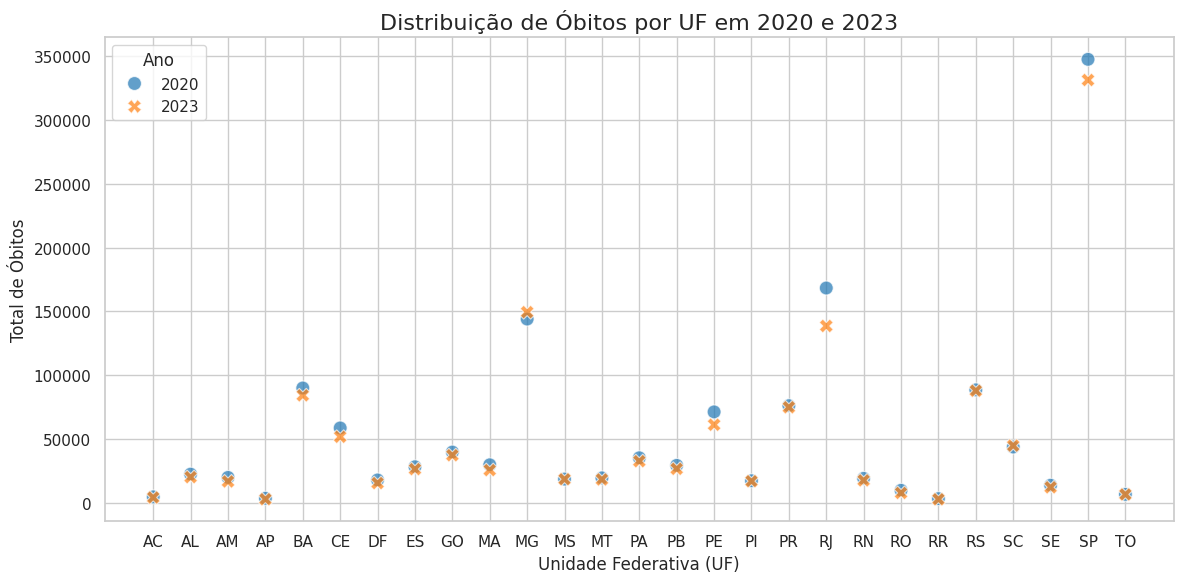

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

df_combined['ano'] = df_combined['ano'].astype(str)

plt.figure(figsize=(12, 6))

sns.scatterplot(
    x='uf',
    y='total',
    hue='ano',
    data=df_combined,
    palette={'2020': '#1f77b4', '2023': '#ff7f0e'},
    style='ano',
    s=100,
    alpha=0.7
)

plt.title('Distribuição de Óbitos por UF em 2020 e 2023', fontsize=16)
plt.xlabel('Unidade Federativa (UF)', fontsize=12)
plt.ylabel('Total de Óbitos', fontsize=12)
plt.legend(title='Ano')

plt.tight_layout()
plt.show()


#####Insights


O gráfico evidencia que o número total de óbitos varia significativamente entre as unidades federativas, com São Paulo e Rio de Janeiro apresentando os maiores totais. A comparação entre 2020 e 2023 sugere possíveis melhorias ou deteriorações na saúde pública, dependendo da UF. Além disso, essas diferenças regionais ressaltam a importância de políticas de saúde personalizadas para atender às necessidades específicas de cada estado.